#**Model Training using Different ML algorithms**

##**Loading the dataset from file called final_dataset.csv**

In [ ]:
!nvidia-smi

Fri Apr 21 18:55:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Importing  Essential Python Modules required during the training
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("/content/sample_data/final_dataset.csv")
dataset=dataset.drop(['Have_At',
                 'Redirection', 'http_https_Domain','SubDomainCount',
                 'Mouse_Over','Right_Click',
                 'Web_Forwards','Google_Index','CopyRightYear',
                 'Domain_Around_CopyRight','SSL_Domain_Name','Submit_Handler','FormMail',
                 'NonStandardPort','IndexPagesCount'],axis=1)
gen_phish=pd.read_csv("/content/sample_data/gen_phish_dataset.csv")
gen_phish=gen_phish.drop(['Have_At',
                 'Redirection', 'http_https_Domain','SubDomainCount',
                 'Mouse_Over','Right_Click',
                 'Web_Forwards','Google_Index','CopyRightYear',
                 'Domain_Around_CopyRight','SSL_Domain_Name','Submit_Handler','FormMail',
                 'NonStandardPort','IndexPagesCount'],axis=1)
gen_legi=pd.read_csv("/content/sample_data/gen_legi_dataset.csv")
gen_legi=gen_legi.drop(['Have_At',
                 'Redirection', 'http_https_Domain','SubDomainCount',
                 'Mouse_Over','Right_Click',
                 'Web_Forwards','Google_Index','CopyRightYear',
                 'Domain_Around_CopyRight','SSL_Domain_Name','Submit_Handler','FormMail',
                 'NonStandardPort','IndexPagesCount'],axis=1)
feature_names=dataset.columns

In [ ]:
dataset.head()

,Domain,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,https://appimage.github.io,0,26,0,0,0,1,1,0,0,1,0.125000,18,0.875,0.166667,0.764706,0.000000,0,0
1,https://twixlmedia.com,0,22,0,0,0,0,0,1,0,0,0.090909,14,0.000,0.363636,0.000000,0.000000,0,0
2,https://naesdezines.blogspot.com,0,32,0,0,1,1,1,1,0,0,0.005236,156,1.000,0.549738,0.722222,0.214660,1,0
3,https://castanimex.blogspot.com,0,31,0,0,1,1,1,1,0,1,0.014706,68,1.000,0.529412,0.945946,0.073529,1,0
4,https://talktoind.wordpress.com,0,31,0,0,0,0,0,0,1,1,0.047170,41,1.000,0.160377,1.000000,0.028302,1,0


In [ ]:
gen_legi.head()

,Domain,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,https://google.com,0,18,0,0,0,0,0,0,0,0,0.000000,7,1.000000,0.588235,0.0,0.000000,0,0
1,https://youtube.com,0,19,0,0,0,0,0,1,1,0,0.133333,5,1.000000,0.600000,0.0,0.000000,0,0
2,https://baidu.com,0,17,0,0,0,0,0,0,0,0,0.000000,1,1.000000,0.909091,0.0,0.000000,0,0
3,https://bilibili.com,0,20,0,0,0,0,0,0,0,1,1.000000,0,1.000000,0.000000,0.0,0.000000,0,0
4,https://facebook.com,0,20,0,0,0,0,0,0,1,0,0.000000,21,0.666667,0.543478,0.5,0.065217,0,0


In [ ]:
gen_phish.head()

,Domain,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,http://bt.attadbehind.work/cl/0_pt/17/120478/8...,1,53,7,0,0,1,1,1,1,1,1.0,0,1.0,1.0,1.0,1.0,1,1
1,https://mnuc2a.webwave.dev/,0,27,0,0,0,0,0,0,1,1,1.0,0,0.0,0.0,0.0,0.0,0,1
2,http://mnuc2a.webwave.dev/,1,26,0,0,0,0,0,0,1,1,1.0,0,0.0,0.0,0.0,0.0,0,1
3,https://winter-hat-9e79.lj1pache.workers.dev/,0,45,0,1,0,1,1,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0,1
4,https://sp960402.sitebeat.crazydomains.com/,0,43,0,0,0,0,0,0,1,0,0.0,0,1.0,1.0,1.0,0.0,0,1


In [ ]:
pd.set_option("display.max_columns",33)
dataset.describe()

,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.042869,37.901260,0.073954,0.345794,0.613369,0.735067,0.747257,0.186306,0.342950,0.870581,0.371823,59.505689,0.901119,0.415120,0.486114,0.104728,0.270012,0.492280
std,0.202582,13.961133,0.422176,0.475675,0.487027,0.441342,0.434629,0.389393,0.474743,0.335697,0.465838,296.867205,0.258929,0.397763,0.475704,0.257761,0.444011,0.499991
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,35.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.035714,0.000000,1.000000,0.326478,0.500000,0.000000,0.000000,0.000000
75%,0.000000,40.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.846154,1.000000,0.038462,1.000000,1.000000
max,1.000000,291.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.set_option("display.max_columns",33)
gen_legi.describe()

,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,2499.0,2499.000000,2499.0,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.0
mean,0.0,19.426170,0.0,0.022409,0.003201,0.144858,0.326931,0.336935,0.366547,0.377351,0.137993,71.385354,0.747745,0.452914,0.539287,0.043855,0.053621,0.0
std,0.0,3.326455,0.0,0.148039,0.056501,0.352028,0.469186,0.472757,0.481958,0.484821,0.328142,163.853674,0.343236,0.381403,0.457558,0.166980,0.225314,0.0
min,0.0,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,17.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.086421,0.000000,0.000000,0.000000,0.0
50%,0.0,19.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006279,21.000000,1.000000,0.346405,0.691729,0.000000,0.000000,0.0
75%,0.0,21.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.026316,82.000000,1.000000,0.905567,1.000000,0.013695,0.000000,0.0
max,0.0,38.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4496.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
pd.set_option("display.max_columns",33)
gen_phish.describe()

,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.0
mean,0.330944,79.262843,1.030267,0.247710,0.007965,0.342493,0.526085,0.076862,0.343290,0.836320,0.452563,2.040621,0.859505,0.520177,0.338495,0.098221,0.043807,1.0
std,0.470647,99.379041,1.489365,0.431768,0.088908,0.474638,0.499419,0.266425,0.474902,0.370058,0.494580,18.217739,0.317924,0.462439,0.469271,0.277942,0.204707,0.0
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.000000,1.0
75%,1.000000,82.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
max,1.000000,822.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,633.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain           4922 non-null   object 
 1   Have_HTTPS       4922 non-null   int64  
 2   URL_Length       4922 non-null   int64  
 3   URL_Depth        4922 non-null   int64  
 4   Prefix_Suffix    4922 non-null   int64  
 5   DNS_Record       4922 non-null   int64  
 6   AgeOfDomain      4922 non-null   int64  
 7   Domain_End       4922 non-null   int64  
 8   iFrame           4922 non-null   int64  
 9   Favicon          4922 non-null   int64  
 10  CopyRightSymbol  4922 non-null   int64  
 11  LinkRatio        4922 non-null   float64
 12  SubPagesCount    4922 non-null   int64  
 13  MLSTagsRatio     4922 non-null   float64
 14  Anchor_URL       4922 non-null   float64
 15  RequestUrl       4922 non-null   float64
 16  Empty_Link       4922 non-null   float64
 17  visibilityMode

In [ ]:
dataset['Label'].value_counts(),gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

(0    2499
 1    2423
 Name: Label, dtype: int64,
 0    2499
 Name: Label, dtype: int64,
 1    2511
 Name: Label, dtype: int64)

In [ ]:
pd.set_option("display.max_columns",33)
dataset.describe()

,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.042869,37.901260,0.073954,0.345794,0.613369,0.735067,0.747257,0.186306,0.342950,0.870581,0.371823,59.505689,0.901119,0.415120,0.486114,0.104728,0.270012,0.492280
std,0.202582,13.961133,0.422176,0.475675,0.487027,0.441342,0.434629,0.389393,0.474743,0.335697,0.465838,296.867205,0.258929,0.397763,0.475704,0.257761,0.444011,0.499991
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,35.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.035714,0.000000,1.000000,0.326478,0.500000,0.000000,0.000000,0.000000
75%,0.000000,40.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.846154,1.000000,0.038462,1.000000,1.000000
max,1.000000,291.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# %matplotlib inline 
# dataset.hist(bins=50 , figsize=(20,15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=42)
print("train_set length : ",len(train_set))
print("test_set length : ",len(test_set))
print("total length : ",len(dataset))

train_set length :  3937
test_set length :  985
total length :  4922


In [ ]:
#To avoid imvalence train set 
from sklearn.model_selection import StratifiedShuffleSplit 
split_data=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split_data.split(dataset,dataset['Label']):
    strat_train_set=dataset.loc[train_index]
    strat_test_set=dataset.loc[test_index]

In [ ]:
strat_test_set['Label'].value_counts(),strat_train_set['Label'].value_counts()

(0    500
 1    485
 Name: Label, dtype: int64,
 0    1999
 1    1938
 Name: Label, dtype: int64)

In [ ]:
dataset=strat_train_set.copy()
testdata=strat_test_set.copy()
dataset.shape,testdata.shape

((3937, 19), (985, 19))

In [ ]:
# corr_matrix=dataset.corr()
# corr_matrix['Label'].sort_values(ascending=False)

In [ ]:
# from pandas.plotting import scatter_matrix 
# scatter_matrix(dataset,figsize=(30,20))

In [ ]:
dataset_x=strat_train_set.drop(['Domain','Label'],axis=1)
dataset_y=strat_train_set["Label"].copy()
dataset_x.shape,dataset_y.shape

((3937, 17), (3937,))

In [ ]:
test_x=strat_test_set.drop(['Domain','Label'],axis=1)
test_y=strat_test_set["Label"].copy()

gen_phish_x=gen_phish.drop(['Domain','Label'],axis=1)
gen_phish_y=gen_phish["Label"].copy()

gen_legi_x=gen_legi.drop(['Domain','Label'],axis=1)
gen_legi_y=gen_legi["Label"].copy()

print("shape of test",test_x.shape,test_y.shape)
print("shape of gen_phish",gen_phish_x.shape,gen_phish_y.shape)
print("shape of gen_legi",gen_legi_x.shape,gen_legi_y.shape)

shape of test (985, 17) (985,)
shape of gen_phish (2511, 17) (2511,)
shape of gen_legi (2499, 17) (2499,)


In [ ]:
dataset_x.head()

,Have_HTTPS,URL_Length,URL_Depth,Prefix_Suffix,DNS_Record,AgeOfDomain,Domain_End,iFrame,Favicon,CopyRightSymbol,LinkRatio,SubPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode
4317,0,39,0,0,0,0,0,0,0,1,0.250000,3,1.0,0.583333,0.000000,0.166667,0
433,0,55,0,1,1,1,1,0,1,1,0.000000,10,1.0,0.970326,0.945946,0.000000,0
2634,0,35,0,0,1,1,1,0,0,1,1.000000,0,1.0,0.000000,0.000000,0.000000,0
2318,0,33,0,0,1,1,1,1,0,1,0.125000,5,1.0,0.125000,0.800000,0.000000,1
27,0,24,0,0,0,0,1,0,0,0,0.017699,48,1.0,0.141593,0.000000,0.017699,0


In [ ]:
dataset_y.head()

4317    1
433     0
2634    1
2318    0
27      0
Name: Label, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('std_scaler',StandardScaler())
])

In [ ]:
dataset_x=my_pipeline.fit_transform(dataset_x)
test_x=my_pipeline.fit_transform(test_x)

gen_legi_x=my_pipeline.fit_transform(gen_legi_x)
gen_phish_x=my_pipeline.fit_transform(gen_phish_x)
print(gen_legi_x[0:1])
print(gen_phish_x[0:1])

[[ 0.         -0.42882163  0.         -0.15140223 -0.05667064 -0.41157788
  -0.69694424 -0.71284448 -0.76068925 -0.77848644 -0.42061085 -0.39302286
   0.73507973  0.35486811 -1.17885453 -0.26268897 -0.23803281]]
[[ 1.42185113 -0.26432208  4.00903986 -0.57382467 -0.08960415  1.38555673
   0.94912207  3.46559702  1.38310992  0.44239607  1.10709252 -0.11203519
   0.44200193  1.03779862  1.40992607  3.24512774  4.67196669]]


In [ ]:
print("training data :",dataset_x.shape)
print("testing data :",test_x.shape)
print("label of training data :",dataset_y.shape)
print("label of test data :",test_y.shape)

training data : (3937, 17)
testing data : (985, 17)
label of training data : (3937,)
label of test data : (985,)


#**GridSearchCV**

In [ ]:
# Number of trees in random forest
# n_estimators = [150,20]
# criterion =['gini','entropy']
# max_features = [0.6,0.8,'sqrt', 'log2', None]
# max_depth = [5,8,None]
# max_samples = [0.75,1.0,None]
# # 108 diff random forest train
# param_grid = {'n_estimators': n_estimators,
#               'criterion':criterion,
#                'max_features': max_features,
#                'max_depth': max_depth,
#               'max_samples':max_samples,
#              }
# print(param_grid)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.neural_network import MLPClassifier
# rf = RandomForestClassifier(n_estimators=150,random_state=42)
# mlp = LogisticRegression()
# rf.fit(dataset_x,dataset_y)
# mlp.fit(dataset_x,dataset_y)

# # Generate predictions using base models on test set
# rf_pred = rf.predict_proba(test_x)[:, 1]
# mlp_pred = mlp.predict_proba(test_x)[:, 1]

# # Combine predictions using a meta-model
# meta_model = LogisticRegression()
# meta_model.fit(np.column_stack((rf_pred, mlp_pred)),test_y)

# # Generate final predictions using the stacked ensemble
# stacked_pred = meta_model.predict_proba(np.column_stack((rf.predict_proba(test_x)[:, 1], mlp.predict_proba(test_x)[:, 1])))[:, 1]

# # Evaluate accuracy of the ensemble model
# ensemble_acc = accuracy_score(test_y, (stacked_pred > 0.5).astype(int))
# print("Ensemble Accuracy:", ensemble_acc)


##**Trying Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier(n_estimators=150,max_samples=0.75,random_state=42)
forest.fit(dataset_x,dataset_y)


# ({'bootstrap': False,
#   'criterion': 'entropy',
#   'max_depth': None,     d0 with nothing 
#   'n_estimators': 120},
#  0.9484397474183914)


# forest =RandomForestClassifier(n_estimators=150,random_state=42)
# Random forest: Accuracy on train Data: 0.983   d1 
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.958

RandomForestClassifier(max_samples=0.75, n_estimators=150, random_state=42)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# rf_grid = GridSearchCV(estimator = forest, 
#                        param_grid = param_grid, 
#                        cv=5,
#                        verbose=2, 
#                        n_jobs = -1)
# rf_grid.fit(dataset_x,dataset_y)

In [ ]:
# rf_grid.best_params_,rf_grid.best_score_

In [ ]:
from sklearn.metrics import accuracy_score
# predicted_train_y= forest.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("Random forest: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
predicted_y= forest.predict(gen_legi_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(gen_legi_y,predicted_y)
print("Random forest: Accuracy on test Data: {:.3f}".format(test_data_acc))


Random forest: Accuracy on test Data: 0.681


In [ ]:
# after considering all features 
# Random forest: Accuracy on train Data: 0.931
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.924

# after considering on seven features 5 roy's +2 mine 
# Random forest: Accuracy on train Data: 0.889
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.861

#  after considering estimates=150/115/120  and maxdepth=default
# Random forest: Accuracy on train Data: 0.982
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.954

# # estimators=150,criterion='log_loss'
# Random forest: Accuracy on train Data: 0.982
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.947

#  estimators=150  removed ['Have_At','Redirection', 'http_https_Domain','SubDomainCount'
                #  ,'Google_Index','CopyRightYear',
                #  'Domain_Around_CopyRight','SSL_Domain_Name','FormMail',
                #  'NonStandardPort','IndexPagesCount']
# Random forest: Accuracy on train Data: 0.981
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.949


# forest = RandomForestClassifier(n_estimators=150)
# Random forest: Accuracy on train Data: 0.982
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.954

# forest =RandomForestClassifier(n_estimators=150,max_samples=0.75,random_state=42)
# Random forest: Accuracy on train Data: 0.980
# --------------------------------------------
# Random forest: Accuracy on test Data: 0.953

# ({'max_depth': None,
#   'max_features': 0.6,
#   'max_samples': 0.75, d0
#   'n_estimators': 80},
#  0.9499648475544863)

# ({'criterion': 'entropy',
#   'max_depth': None,
#   'max_features': 0.1,     d1 with randomstate=42
#   'max_samples': 0.5,
#   'n_estimators': 150},
#  0.9535610242766877)

# ({'criterion': 'entropy',  d0  with randomstate=42
#   'max_depth': None,
#   'max_features': 'sqrt',
#   'max_samples': 0.5,
#   'n_estimators': 80},
#  0.9527593057230762)

##**Observing the importance of features on our result**

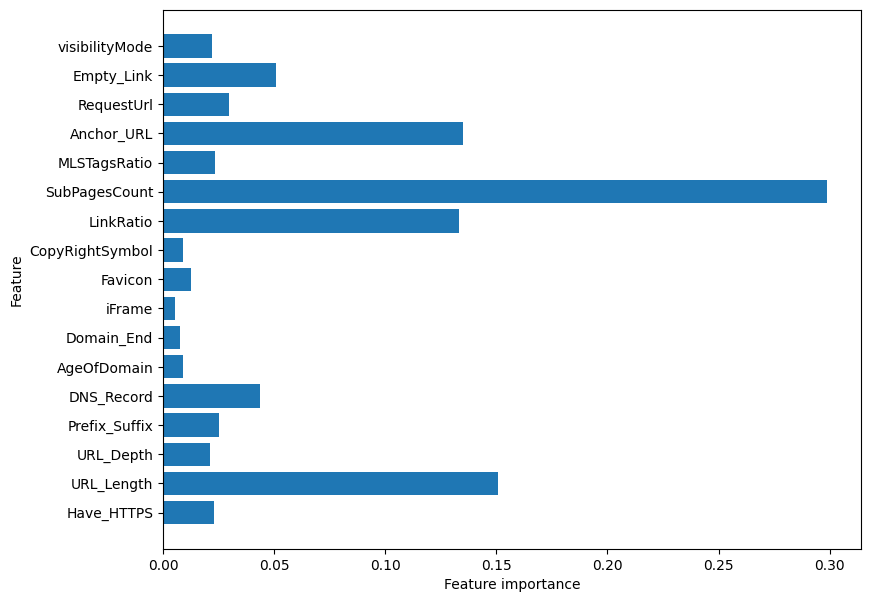

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
features_count = dataset_x.shape[1]
plt.barh(range(features_count), forest.feature_importances_, align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#**Trying Decision Tree Classifier**

In [ ]:
# # Decision Tree model 
# from sklearn.tree import DecisionTreeClassifier
# # instantiate the model 
# tree = DecisionTreeClassifier(random_state=42)
# # fit the model 
# tree.fit(dataset_x,dataset_y)

In [ ]:
# from sklearn.metrics import accuracy_score
# predicted_train_y= tree.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("Decision Tree: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
# predicted_test_y= tree.predict(test_x)
# #computing the accuracy of the model performance
# test_data_acc= accuracy_score(test_y,predicted_test_y)
# print("Decision Tree: Accuracy on test Data: {:.3f}".format(test_data_acc))


# # Decision Tree: Accuracy on train Data: 0.929
# # --------------------------------------------
# # Decision Tree: Accuracy on test Data: 0.906


In [ ]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# features_count = dataset_x.shape[1]
# plt.barh(range(features_count), tree.feature_importances_, align='center')
# plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

#**Trying XGBoost Classifier**

In [ ]:
# #XGBoost Classification model
# from xgboost import XGBClassifier
# # instantiate the model
# xgb = XGBClassifier(learning_rate=0.4,random_state=42,max_depth=8,n_estimators=120,n_jobs=-1)
# #fit the model
# xgb.fit(dataset_x,dataset_y)

In [ ]:
# from sklearn.metrics import accuracy_score
# predicted_train_y= xgb.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("XGB Classifier: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
# predicted_test_y= xgb.predict(test_x)
# #computing the accuracy of the model performance
# test_data_acc= accuracy_score(test_y,predicted_test_y)
# print("XGB Classifier: Accuracy on test Data: {:.3f}".format(test_data_acc))

# XGB Classifier: Accuracy on train Data: 0.980
# --------------------------------------------
# XGB Classifier: Accuracy on test Data: 0.921

# XGB Classifier: Accuracy on train Data: 0.981
# --------------------------------------------
# XGB Classifier: Accuracy on test Data: 0.944


In [ ]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# features_count = dataset_x.shape[1]
# plt.barh(range(features_count), xgb.feature_importances_, align='center')
# plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

##**Trying Multilayer Perceptrons(Deep Learning)**

In [ ]:
# # Multilayer Perceptrons model
# from sklearn.neural_network import MLPClassifier
# # instantiate the model
# mlp = MLPClassifier(alpha=0.001,learning_rate='adaptive',random_state=42,hidden_layer_sizes=([100,100,100]))
# # fit the model 
# mlp.fit(dataset_x,dataset_y)

In [ ]:
# from sklearn.metrics import accuracy_score
# predicted_train_y= mlp.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("MLP Classifier: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
# predicted_test_y= mlp.predict(test_x)
# #computing the accuracy of the model performance
# test_data_acc= accuracy_score(test_y,predicted_test_y)
# print("MLP Classifier: Accuracy on test Data: {:.3f}".format(test_data_acc))

# # MLP Classifier: Accuracy on train Data: 0.971
# # --------------------------------------------
# # MLP Classifier: Accuracy on test Data: 0.958
# (alpha=0.01,hidden_layer_sizes=([100,100,100]))
# MLP Classifier: Accuracy on train Data: 0.970
# --------------------------------------------
# MLP Classifier: Accuracy on test Data: 0.960

#mlp = MLPClassifier(alpha=0.001,learning_rate='adaptive',hidden_layer_sizes=([100,100,100]))
# MLP Classifier: Accuracy on train Data: 0.970
# --------------------------------------------
# MLP Classifier: Accuracy on test Data: 0.960

# MLPClassifier(alpha=0.001,learning_rate='adaptive',random_state=42,hidden_layer_sizes=([100,100,100]))
# MLP Classifier: Accuracy on train Data: 0.972
# --------------------------------------------
# MLP Classifier: Accuracy on test Data: 0.965

#**Trying Logistic Regression**

In [ ]:
# # Logistic Regression Model
# from sklearn.linear_model import LogisticRegression
# # instantiate the model
# model = LogisticRegression()
# # fit the model 
# model.fit(dataset_x,dataset_y)

In [ ]:
# from sklearn.metrics import accuracy_score
# predicted_train_y= model.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("Logistic Regression: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
# predicted_test_y= model.predict(test_x)
# #computing the accuracy of the model performance
# test_data_acc= accuracy_score(test_y,predicted_test_y)
# print("Logistic Regression: Accuracy on test Data: {:.3f}".format(test_data_acc))

# # Logistic Regression: Accuracy on train Data: 0.924
# # --------------------------------------------
# # Logistic Regression: Accuracy on test Data: 0.928


In [ ]:
# model.coef_[0]

In [ ]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# features_count = dataset_x.shape[1]
# plt.barh(range(features_count), abs(model.coef_[0]), align='center')
# plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# model = SVC(kernel='rbf',random_state=42)
# model.fit(dataset_x,dataset_y)
# from sklearn.metrics import accuracy_score
# predicted_train_y= model.predict(dataset_x)
# #computing the accuracy of the model performance
# train_data_acc= accuracy_score(dataset_y,predicted_train_y)
# print("Logistic Regression: Accuracy on train Data: {:.3f}".format(train_data_acc))
# print('--------------------------------------------')
# predicted_test_y= model.predict(test_x)
# #computing the accuracy of the model performance
# test_data_acc= accuracy_score(test_y,predicted_test_y)
# print("Logistic Regression: Accuracy on test Data: {:.3f}".format(test_data_acc))
